In [1]:
#general libraries
import os.path
import os
from pathlib import Path
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import cv2
from PIL import Image
from warnings import filterwarnings
filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore",category=DeprecationWarning)
from scipy.ndimage.filters import convolve

# Tensotflow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D

#Keras libraries
from keras import models, layers, regularizers
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD


from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

#Sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression




## Create Path to images

In [2]:
Crack_Pics= Path(r"\Users\rkhan\OneDrive\Desktop\UCF\Master Sememesters\1st Semester\CAP5610\Project")


## Add jpeg to end of images

In [3]:
Crack_Jpeg = list(Crack_Pics.glob(r"*/*.jpg"))

## Labeling Data to Pos and Neg samples

In [4]:
Crack_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Crack_Jpeg))

## Conversion to Panda 

In [5]:
Crack_Jpeg_Pandas = pd.Series(Crack_Jpeg,name="Pics").astype(str)
Crack_Labels_Pandas = pd.Series(Crack_Labels,name="Label")

## concatinate labels and pics

In [6]:
Full_Crack_Data = pd.concat([Crack_Jpeg_Pandas,Crack_Labels_Pandas],axis=1)


## diplaying data

In [7]:
Full_Crack_Data.head(-10)

,Pics,Label
0,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
1,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
2,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
3,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
4,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
...,...,...
39985,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
39986,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
39987,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
39988,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive


## shuffling data to separate train and test accordingly

In [8]:
Shuffled_Full_Crack_Data = Full_Crack_Data.sample(frac=1).reset_index(drop=True)


In [9]:
Shuffled_Full_Crack_Data.head(-10)

,Pics,Label
0,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
1,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
2,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
3,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
4,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
...,...,...
39985,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
39986,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
39987,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
39988,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive


## Displaying data

In [10]:
Positive_Samples = Shuffled_Full_Crack_Data[Shuffled_Full_Crack_Data["Label"] == "Positive"]
Positive_Samples = Positive_Samples.reset_index()

Negative_Samples = Shuffled_Full_Crack_Data[Shuffled_Full_Crack_Data["Label"] == "Negative"]
Negative_Samples = Negative_Samples.reset_index()

### Display pics

In [11]:
def pic_show(pic):
    Img = cv2.imread(pic)
    Img = cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)    
    figure = plt.figure(figsize=(2,2))
    plt.imshow(Img)

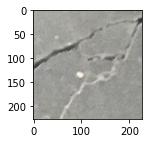

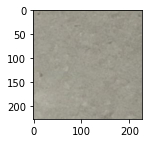

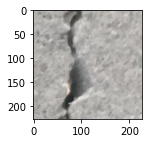

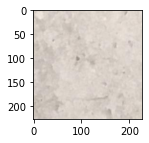

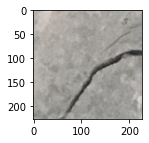

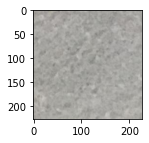

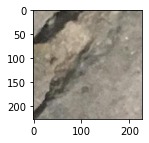

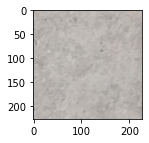

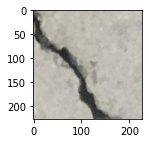

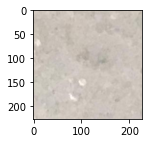

In [12]:
for i in range(5):
    pic_show(Positive_Samples["Pics"][i])
    pic_show(Negative_Samples["Pics"][i])

## Canny Function:

In [13]:
def canny(pic):
    Img = cv2.imread(pic)
    Img = cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)
    Canny = cv2.Canny(Img,100,150)
    figure = plt.figure(figsize=(2,2))
    plt.imshow(Canny)

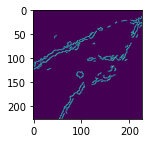

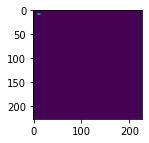

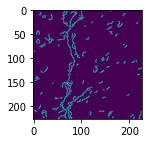

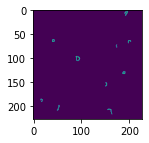

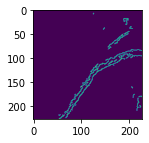

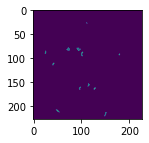

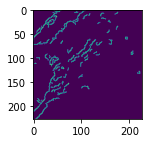

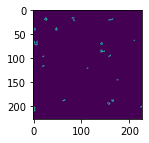

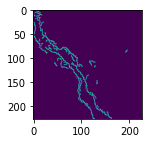

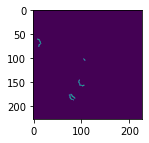

In [14]:
for i in range(5):
    canny(Positive_Samples["Pics"][i])
    canny(Negative_Samples["Pics"][i])

## Thresholding

In [86]:
def threshold(pic):
    
    Img = cv2.imread(pic)
    Img = cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)
    _,Threshold = cv2.threshold(Img,110,255,cv2.THRESH_BINARY_INV)
    figure = plt.figure(figsize=(2,2))
    plt.imshow(Threshold)

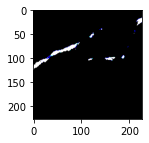

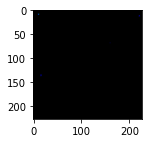

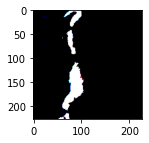

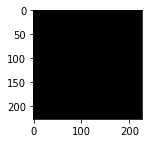

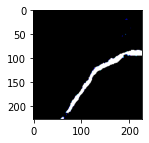

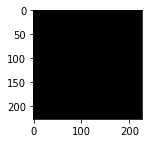

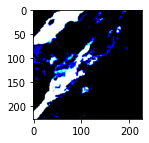

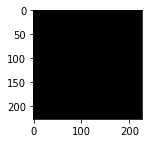

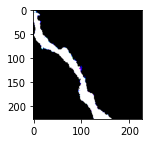

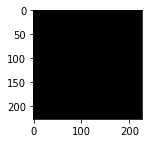

In [87]:
for i in range(5):
    threshold(Positive_Samples["Pics"][i])
    threshold(Negative_Samples["Pics"][i])

In [17]:
def canny_tresh(pic):
    Img = cv2.imread(pic)
    Img = cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)
    _,Threshold = cv2.threshold(Img,120,255,cv2.THRESH_BINARY_INV)
    Canny= cv2.Canny(Threshold,80,100)
    figure = plt.figure(figsize=(2,2))
    plt.imshow(Canny)

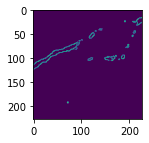

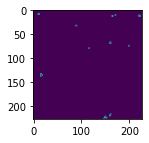

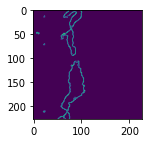

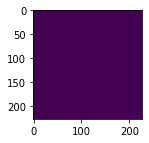

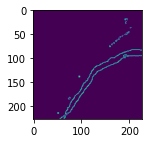

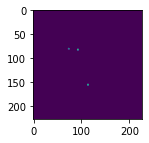

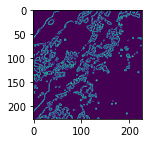

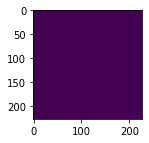

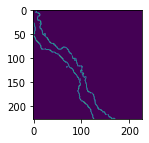

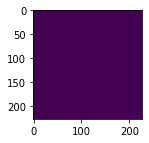

In [18]:
for i in range(5):
    canny_tresh(Positive_Samples["Pics"][i])
    canny_tresh(Negative_Samples["Pics"][i])

## Contouring

In [94]:
def contouring(pic):

    Img = cv2.imread(pic)
    Img = cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)
    _,Threshold = cv2.threshold(Img,110,255,cv2.THRESH_BINARY_INV)
    Canny= cv2.Canny(Threshold,80,100)
    Contours,_ = cv2.findContours(Canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    Lines = cv2.drawContours(Img,Contours,-1,(255,0,0),1)
    figure = plt.figure(figsize=(2,2))
    plt.imshow(Lines)
    

    

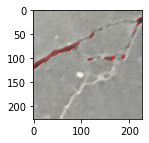

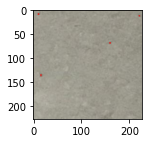

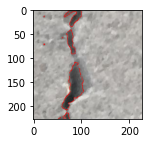

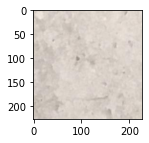

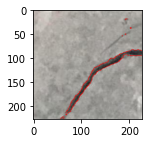

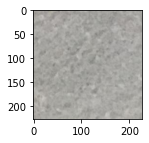

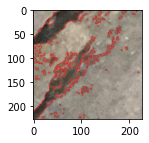

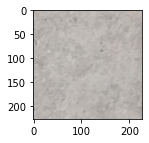

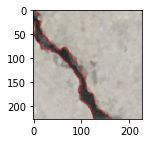

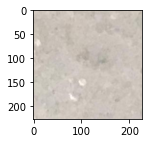

In [95]:
for i in range(5):
    contouring(Positive_Samples["Pics"][i])
    contouring(Negative_Samples["Pics"][i])

## Threshold Skeleton Morphology

In [21]:
def Morphology(pic):

    Img = cv2.imread(pic)
    Img = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)
    _,thresh_pic = cv2.threshold(Img,100,255,cv2.THRESH_BINARY_INV)
    pic_list = np.array(Img > thresh_pic).astype(int)
    Morphology_pic = skimage.morphology.skeletonize(pic_list)
    figure,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
    ax[0].imshow(Img,cmap="Greys_r")
    ax[1].imshow(Morphology_pic)

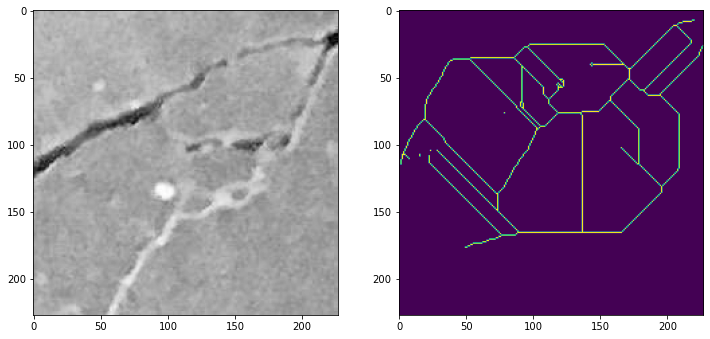

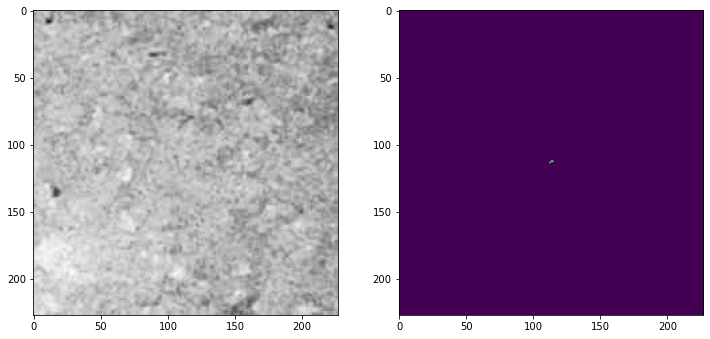

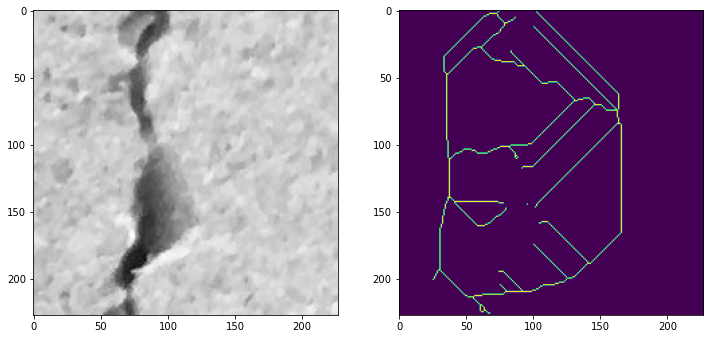

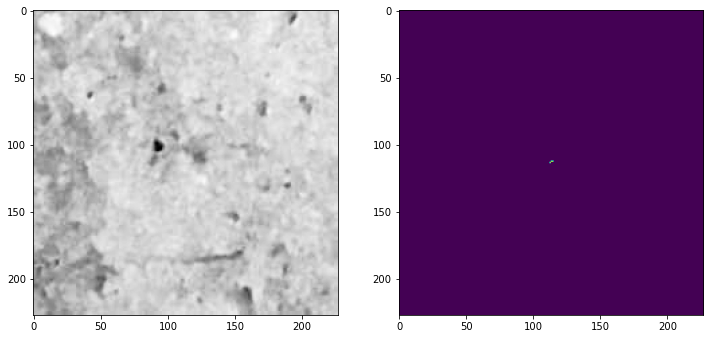

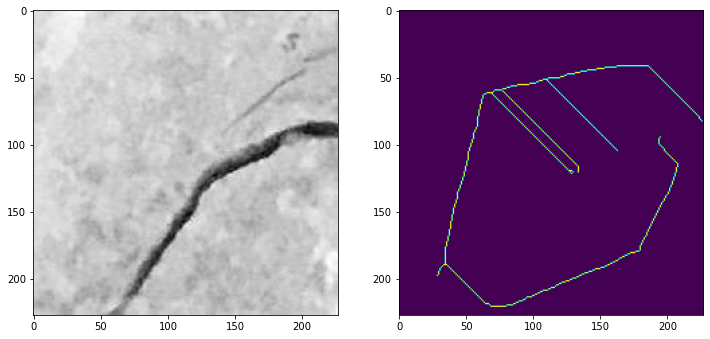

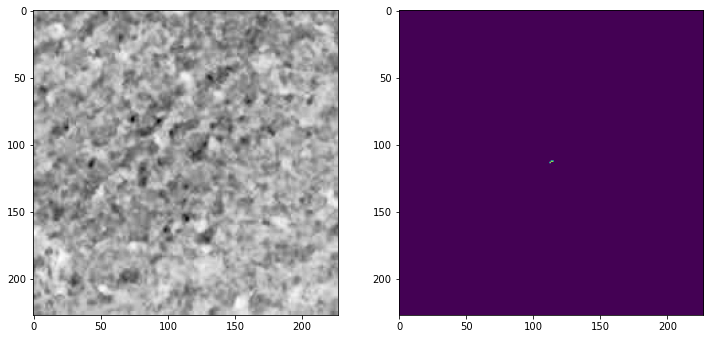

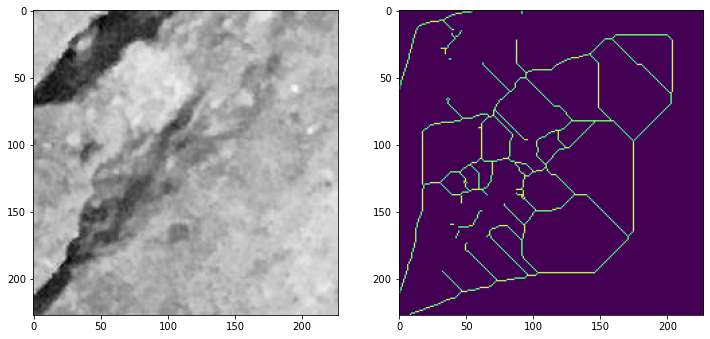

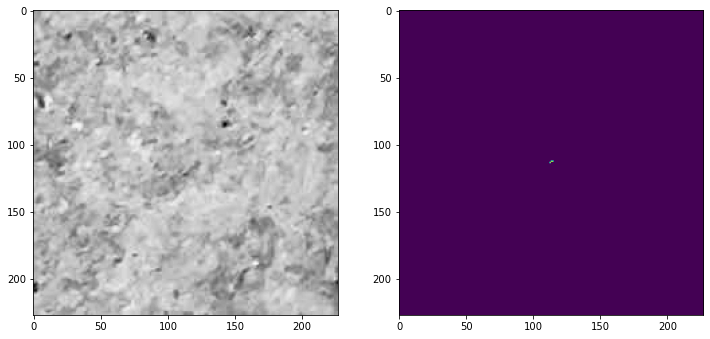

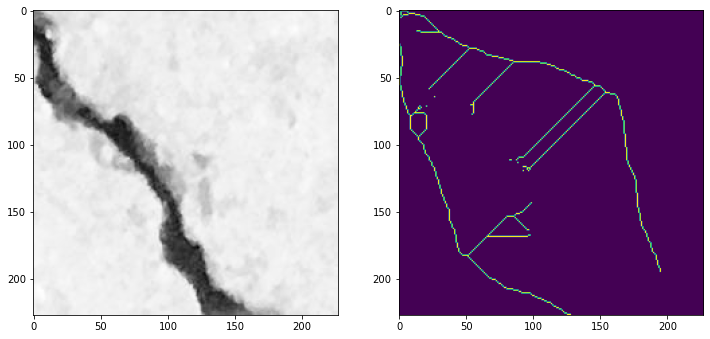

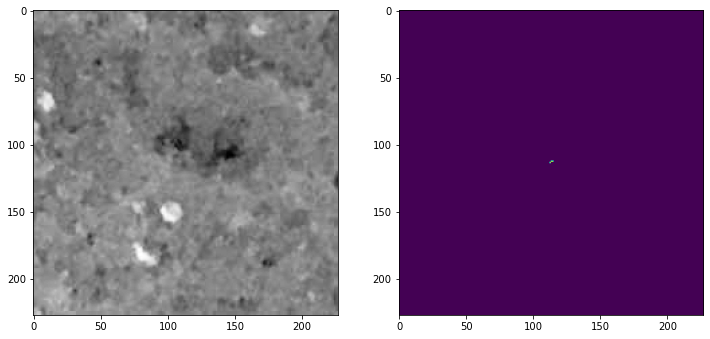

In [22]:
for i in range(5):
    Morphology(Positive_Samples["Pics"][i])
    Morphology(Negative_Samples["Pics"][i])

## Canny Skeleton Morphology

In [23]:
def Canny_Morphology(pic):

    Img = cv2.imread(pic)
    Img = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)
    _,thresh_pic = cv2.threshold(Img,100,255,cv2.THRESH_BINARY_INV)
    canny = cv2.Canny(thresh_pic,90,100)
    pic_list = np.array(Img > canny).astype(int)
    Morphology_pic = skimage.morphology.skeletonize(pic_list)
    figure,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
    ax[0].imshow(Img,cmap="Greys_r")
    ax[1].imshow(Morphology_pic)


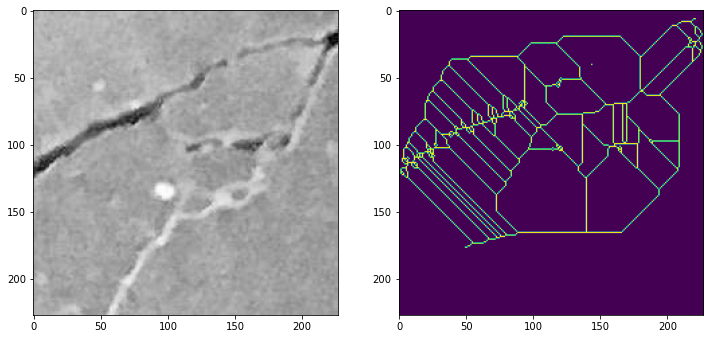

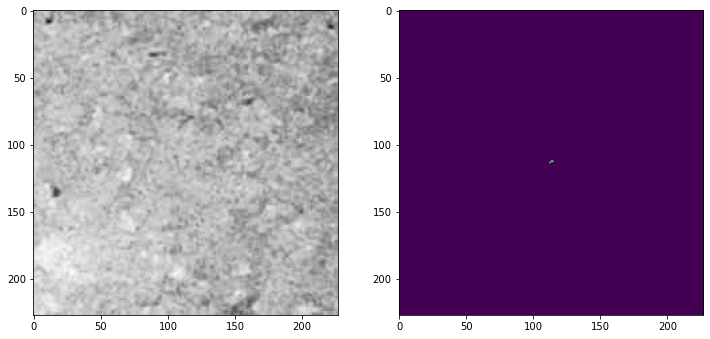

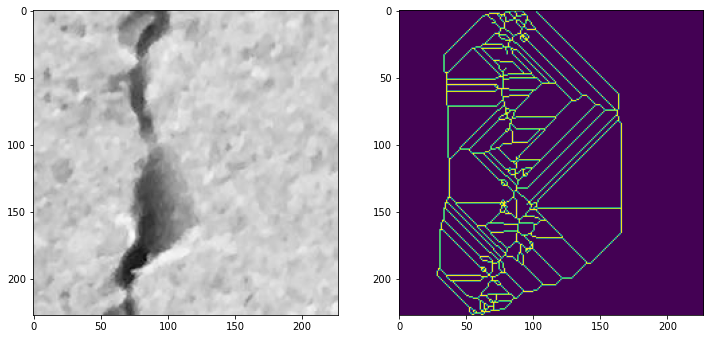

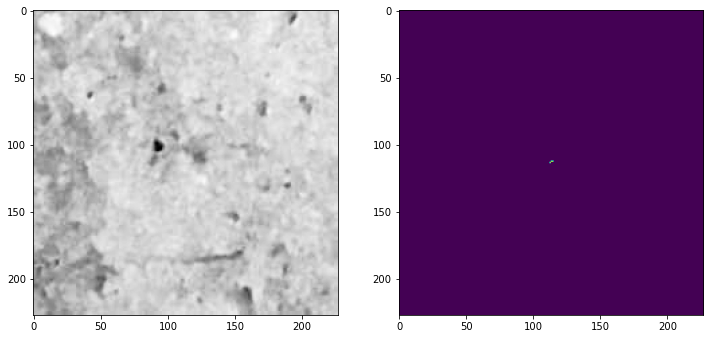

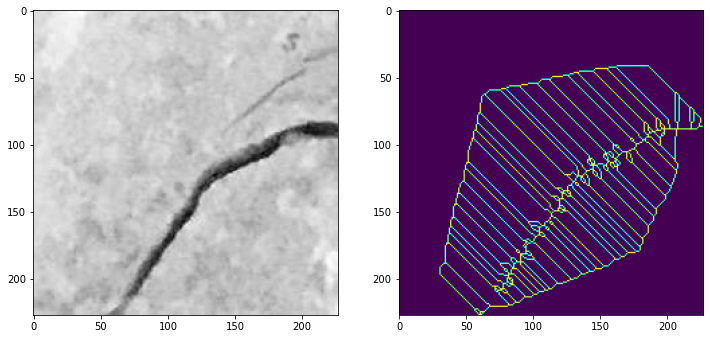

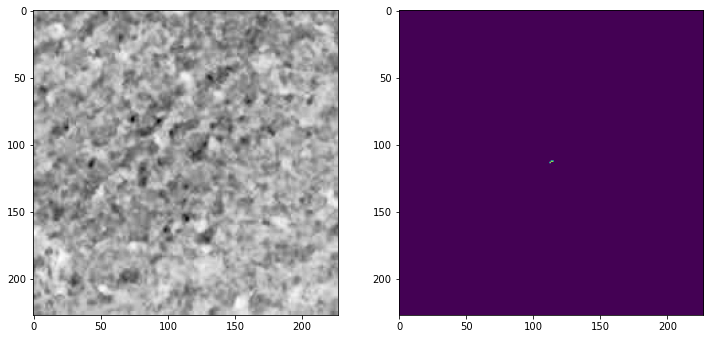

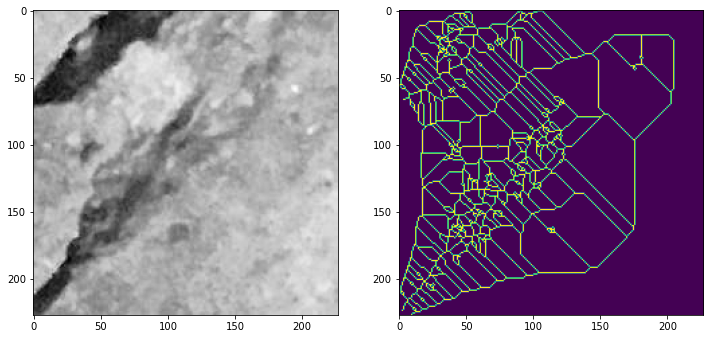

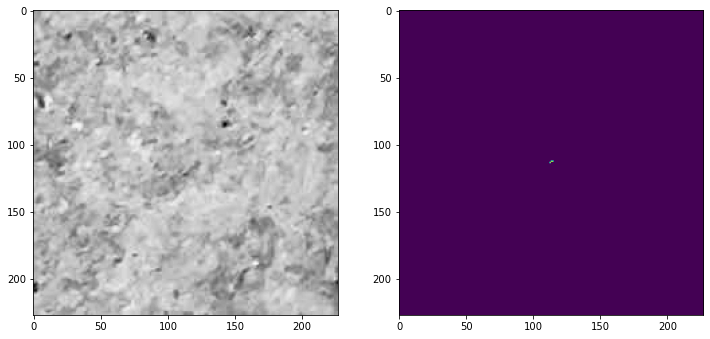

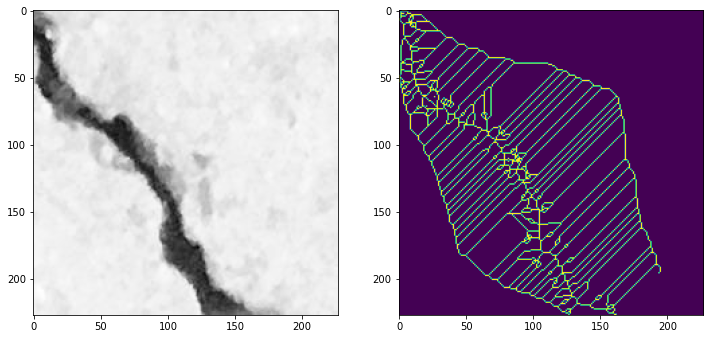

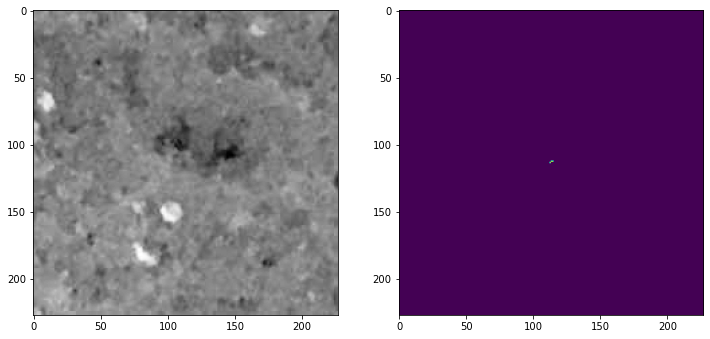

In [24]:
for i in range(5):
    Canny_Morphology(Positive_Samples["Pics"][i])
    Canny_Morphology(Negative_Samples["Pics"][i])

## Preparing Data for testing and training

### Since we will be using CNNs we chose only 10% test vs training data

In [25]:
X_train,X_test = train_test_split(Shuffled_Full_Crack_Data,train_size=0.9,shuffle=True,random_state=77)


In [26]:
X_train.head(10)

,Pics,Label
36876,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
16019,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
3593,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
1245,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
15889,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
31019,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
31133,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
23264,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
12508,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
37230,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive


In [27]:
X_test.head(10)

,Pics,Label
17712,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
22541,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
19874,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
19827,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
34084,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
16001,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
4108,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Negative
12845,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
13546,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive
1387,\Users\rkhan\OneDrive\Desktop\UCF\Master Semem...,Positive


In [28]:
X_test.shape

(4000, 2)

In [29]:
X_train.shape

(36000, 2)

## Augment and Split data to test, validate and train 

In [30]:
Train_gen = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
                                        shear_range=0.5,
                                        zoom_range=0.5,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        brightness_range=[0.6,0.9],
                                        vertical_flip=True,
                                        validation_split=0.1)

In [31]:
Test_gen = ImageDataGenerator(rescale=1./255)


In [32]:
Training_Data = Train_gen.flow_from_dataframe(dataframe=X_train, x_col="Pics", y_col="Label", 
                                              color_mode="rgb",class_mode="binary", target_size=(200,200), 
                                              subset="training",batch_size=32,seed=42)
                                                   
                                                   
                                                   
                                                   
                                                   
                                                    

Found 32400 validated image filenames belonging to 2 classes.


In [33]:
Valid_Data = Train_gen.flow_from_dataframe(dataframe=X_train, x_col="Pics",y_col="Label",color_mode="rgb",
                                                   class_mode="binary", target_size=(200,200),subset="validation",
                                                    batch_size=32,seed=42)

Found 3600 validated image filenames belonging to 2 classes.


In [34]:
Testing_Data = Test_gen.flow_from_dataframe(dataframe=X_test, x_col="Pics", y_col="Label",color_mode="rgb",class_mode="binary",
                                                   target_size=(200,200),batch_size=32,seed=42)

Found 4000 validated image filenames belonging to 2 classes.


##  Creating Model RNN-LSTM

### defining model parameters:

In [35]:
category = 1
loss_function = "binary_crossentropy"
optimizer = "adam"
inputModel = (Training_Data.image_shape[0],Training_Data.image_shape[1],Training_Data.image_shape[2])


In [36]:
stop_point = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=4,mode="min")
Model_check = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy", save_best_only=True, save_weights_only=True,
                                                      filepath="./modelcheck")

### Model creation

In [37]:
Model = Sequential()

#layer one
Model.add(Conv2D(32,(3,3),activation="relu",input_shape=inputModel))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2),strides=2))

#layer Two
Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2),strides=2))

#layer Three
Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

#layer Four
Model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.4))
Model.add(MaxPooling2D((2,2),strides=2))

#layer Five
Model.add(Flatten())
Model.add(Dense(1024,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(category,activation="sigmoid"))

### Running the model

In [38]:
Model.compile(optimizer=optimizer,loss=loss_function ,metrics=["accuracy"])

In [69]:
RNN = Model.fit(Training_Data, validation_data=Valid_Data,callbacks=[stop_point,Model_check],epochs=10)

Epoch 1/10
1013/1013 [==============================] - 1682s 2s/step - loss: 0.0263 - accuracy: 0.9927 - val_loss: 0.0437 - val_accuracy: 0.9867
Epoch 2/10
1013/1013 [==============================] - 1659s 2s/step - loss: 0.0278 - accuracy: 0.9926 - val_loss: 0.0550 - val_accuracy: 0.9797
Epoch 3/10
1013/1013 [==============================] - 1651s 2s/step - loss: 0.0254 - accuracy: 0.9935 - val_loss: 0.0255 - val_accuracy: 0.9908
Epoch 4/10
1013/1013 [==============================] - 1740s 2s/step - loss: 0.0266 - accuracy: 0.9935 - val_loss: 0.0238 - val_accuracy: 0.9939
Epoch 5/10
1013/1013 [==============================] - 1733s 2s/step - loss: 0.0331 - accuracy: 0.9920 - val_loss: 0.0486 - val_accuracy: 0.9842
Epoch 6/10
1013/1013 [==============================] - 1804s 2s/step - loss: 0.0320 - accuracy: 0.9913 - val_loss: 0.0348 - val_accuracy: 0.9878
Epoch 7/10
1013/1013 [==============================] - 1740s 2s/step - loss: 0.0314 - accuracy: 0.9915 - val_loss: 0.0502 -

## Model Summary

In [74]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 99, 99, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 99, 99, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0

In [75]:
Model.save("Model.h5")

## Training Loss Error Visualization

<AxesSubplot:>

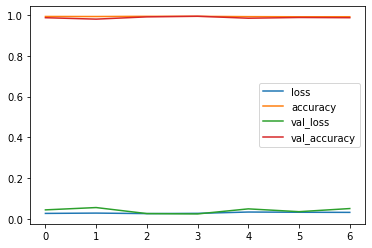

In [76]:
Visuals = pd.DataFrame(RNN.history)
Visuals.plot()

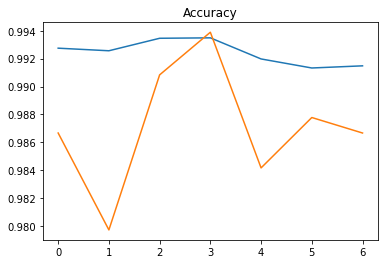

In [77]:
plt.plot(RNN.history["accuracy"])
plt.plot(RNN.history["val_accuracy"])
plt.title("Accuracy")
plt.show()

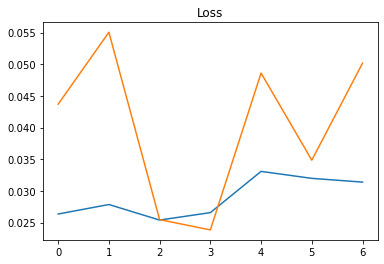

In [78]:
plt.plot(RNN.history["loss"])
plt.plot(RNN.history["val_loss"])
plt.title("Loss")
plt.show()

## Prediction 

In [79]:
Pred = Model.evaluate(Testing_Data)
print("Our model's loss is:  " + str(Pred[0]), " And Our model's Accyracy is:  " + str(Pred[1]))

125/125 [==============================] - 39s 312ms/step - loss: 0.0084 - accuracy: 0.9973
Our model's loss is:  0.008397608995437622  And Our model's Accyracy is:  0.9972500205039978


In [80]:
Pred_final = Model.predict(Testing_Data)
Pred_final = Pred_final.argmax(axis=-1)


125/125 [==============================] - 39s 311ms/step


## Visualizing Some Prediction Results

## Crack Detection Using Only OpenCV functions (contouring)

In [81]:
def crack(img, thresh):
    
    #load image
    Img = cv2.imread(img)
    # convert image to gray to perform tranformations
    grayImg = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
    
    #sharpen image
    sharp = np.array([[-1,-1,-1], [-1,11,-1], [-1,-1,-1]])
    Img_Sharp = cv2.filter2D(grayImg, -1, sharp)
    
    #blurring image
    Img_Blur = cv2.GaussianBlur(Img_Sharp, (3, 3), 0)
    
    #make image binary
    x, y= cv2.threshold(Img_Blur, 235, 255, cv2.THRESH_BINARY_INV)
    
    # contours
    c, z = cv2.findContours(y, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    if c:
        max_Len = max([len(con) for con in c])
        if max_Len < thresh:
            return True
        else:
            return False
    else:
        return True
    

In [82]:
result = dict()
pos=0
neg=0
#looping over shuffled data
for i in range(len(Shuffled_Full_Crack_Data)):

    crack_status = crack(Shuffled_Full_Crack_Data["Pics"][i], 80)
    if crack_status:
        pos+=1
    else:
        neg+=1

In [83]:
pos

20919

In [84]:
neg

19081

### Accuracy = (TP + TN) / (TP + TN + FP + FN)
### Precision = TP / (TP + FP)
### Recall = TP / (TP + FN)
### F1 Score = (2 x Precision x Recall) / (Precision + Recall)


In [85]:
TotalPos = 20000
FalsPos = pos-20000

Precision = TotalPos/ (TotalPos + FalsPos)

RealNeg = neg

accuracy = (TotalPos + RealNeg) / (40000 + FalsPos)

Recall = TotalPos/(TotalPos+0)

Fscore = (2*Recall *Precision )/ (Precision +Recall)
print(f'Accuracy is {accuracy*100}%')
print(f'Precision is {Precision*100}%')
print(f'Recall is {Recall*100}%')
print(f'F1 Score is {Fscore*100}%')


Accuracy is 95.50819912510082%
Precision is 95.60686457287633%
Recall is 100.0%
F1 Score is 97.7540995625504%
